# Compute performance metrics for the given Y and Y_score without sklearn

In [61]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

## 1 Confusion Matrix

In [62]:
# importing the dataset

In [63]:
df = pd.read_csv("5_a.csv")
data = df.copy()

In [64]:
data['y'].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [65]:
# A function to convert the probablities less than 0.5 to 0 and more than 0.5 to 1
def convert_proababities_to_0_1(prob):
    if prob < 0.5:
        return 0
    elif prob >= 0.5 and prob <= 1:
        return 1

In [66]:
# adding the predicted y values to the data
data['pred_y'] = data['proba'].map(convert_proababities_to_0_1)

In [67]:
# the dataset after converting the predicted probablities to 0 or 1
data.head()

,y,proba,pred_y
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [68]:
# calculating the TP , FP , TN  , FN

TP = len(data[data['y'] == 1][data['pred_y'] == 1])
FP = len(data[data['y'] == 0][data['pred_y'] == 1])
TN = len(data[data['y'] == 0][data['pred_y'] == 0])
FN = len(data[data['y'] == 1][data['pred_y'] == 0])

/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [69]:
# Ans 1: Confusion matrix
confusion_matrix = np.array([[TN, FN],
                            [FP , TP]])

In [70]:
confusion_matrix

array([[    0,     0],
       [  100, 10000]])

## 2 F1 Score

In [71]:
precision=((TP)/(TP+FP))
recall=((TP)/(TP+FN))

print(" Recall : {}  and Precision : {}".format(recall,precision))

 Recall : 1.0  and Precision : 0.9900990099009901


In [72]:
# Calculating the F1 score

F1 = 2*(precision*recall)/(precision + recall)
print("The F1 score is {}".format(F1))

The F1 score is 0.9950248756218906


 ## 3  AUC Score

  0%|          | 0/10100 [00:00<?, ?it/s]/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
100%|██████████| 10100/10100 [02:41<00:00, 62.37it/s]


The AUC score is: 0.48829900000000004 




[]

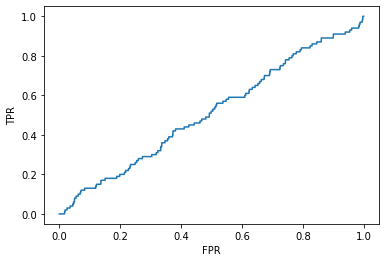

In [73]:
data = pd.read_csv("5_a.csv")
fpr_lst = []  # This list will store all the false positive rates for all the thresholds 
tpr_lst = []  # This list will store all the true positive rates for all the thresholds
data = data.sort_values('proba', ascending= True)
threshold = data.proba.values

for thresh in tqdm(threshold):
    y_pred = []
    for val in threshold:
        if val < thresh:
            y_pred.append(0)
        else:
            y_pred.append(1)
        
    data['pred_y'] = y_pred
    
    TP = len(data[data['y'] == 1][data['pred_y'] == 1])
    FP = len(data[data['y'] == 0][data['pred_y'] == 1])
    TN = len(data[data['y'] == 0][data['pred_y'] == 0])
    FN = len(data[data['y'] == 1][data['pred_y'] == 0])
    fpr_lst.append(FP/(FP + TN))
    tpr_lst.append(TP/(TP+FN))

y = sorted(fpr_lst)
x = sorted(tpr_lst)


print("The AUC score is: {}".format(np.trapz(x,y)),'\n\n')

plt.xlabel("FPR")
plt.ylabel('TPR')
sns.lineplot(x, y)
plt.plot()

In [47]:
data['proba'][0]

0.6373866237658206

In [38]:
data = pd.read_csv("5_a.csv")
data = data.sort_values('proba', ascending= True)
data.head(10)

,y,proba
5012,1.0,0.500019
805,1.0,0.500047
7421,1.0,0.500058
1630,1.0,0.500058
8294,1.0,0.500081
5097,1.0,0.500198
2783,1.0,0.500200
4403,1.0,0.500244
1849,1.0,0.500301
1979,1.0,0.500308


## 4 Accuracy score

In [15]:
accuracy_score = (TP + TN)/(TP + TN + FP + FN)

In [16]:
accuracy_score

0.01

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [17]:
# Importing the second dataset

df = pd.read_csv("5_b.csv")
data2 = df.copy()

In [18]:
# adding the predicted y values to the data
data2['pred_y'] = data2['proba'].map(convert_proababities_to_0_1)

In [19]:
# the dataset after converting the predicted probablities to 0 or 1
data2.head()

,y,proba,pred_y
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [20]:
data2.describe()

,y,proba,pred_y
count,10100.000000,10100.000000,10100.000000
mean,0.009901,0.305528,0.029109
std,0.099015,0.120127,0.168120
min,0.000000,0.100001,0.000000
25%,0.000000,0.201188,0.000000
50%,0.000000,0.303369,0.000000
75%,0.000000,0.410823,0.000000
max,1.000000,0.595294,1.000000


In [21]:
data2['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [22]:
# calculating the TP , FP , TN  , FN

TP = len(data[data2['y'] == 1][data2['pred_y'] == 1])
FP = len(data[data2['y'] == 0][data2['pred_y'] == 1])
TN = len(data[data2['y'] == 0][data2['pred_y'] == 0])
FN = len(data[data2['y'] == 1][data2['pred_y'] == 0])

/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## 1 Confusion matrix

In [23]:
# Ans 1: Confusion matrix
confusion_matrix = np.array([[TN, FN],
                            [FP , TP]])
confusion_matrix

array([[9761,   45],
       [ 239,   55]])

##  2 F1 score

In [24]:
precision=((TP)/(TP+FP))
recall=((TP)/(TP+FN))

print(" Recall : {}  and Precision : {}".format(recall,precision))

 Recall : 0.55  and Precision : 0.1870748299319728


In [25]:
F1 = 2*(precision*recall)/(precision + recall)
print("The F1 score is {}".format(F1))

The F1 score is 0.2791878172588833


 ##  3 AUC score

  0%|          | 0/10100 [00:00<?, ?it/s]/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
100%|██████████| 10100/10100 [01:40<00:00, 100.72it/s]


The AUC score is: 0.9377570000000001 




[]

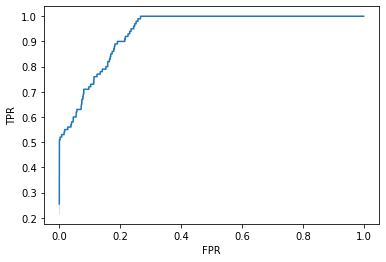

In [76]:
data = pd.read_csv("5_b.csv")
fpr_lst = []  # This list will store all the false positive rates for all the thresholds 
tpr_lst = []  # This list will store all the true positive rates for all the thresholds
data = data.sort_values('proba', ascending= True)
threshold = data.proba.values

for thresh in tqdm(threshold):
    y_pred = []
    for val in threshold:
        if val < thresh:
            y_pred.append(0)
        else:
            y_pred.append(1)
        
    data['pred_y'] = y_pred
    
    TP = len(data[data['y'] == 1][data['pred_y'] == 1])
    FP = len(data[data['y'] == 0][data['pred_y'] == 1])
    TN = len(data[data['y'] == 0][data['pred_y'] == 0])
    FN = len(data[data['y'] == 1][data['pred_y'] == 0])
    fpr_lst.append(FP/(FP + TN))
    tpr_lst.append(TP/(TP+FN))

y = sorted(fpr_lst)
x = sorted(tpr_lst)


print("The AUC score is: {}".format(np.trapz(x,y)),'\n\n')

plt.xlabel("FPR")
plt.ylabel('TPR')
sns.lineplot(y,x)
plt.plot()

## 4 Accuracy Score

In [26]:
accuracy_score = (TP + TN)/(TP + TN + FP + FN)
accuracy_score

0.9718811881188119

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

##  Best threshold value

In [68]:
data = pd.read_csv("5_c.csv")
data.describe()

,y,prob
count,2852.000000,2852.000000
mean,0.367111,0.370069
std,0.482102,0.207414
min,0.000000,0.028038
25%,0.000000,0.201460
50%,0.000000,0.336935
75%,1.000000,0.509001
max,1.000000,0.957747


In [69]:
data = pd.read_csv("5_c.csv")
data = data.sort_values('prob', ascending= True)

A_lst = []

threshold = data.prob.values

for thresh in tqdm(threshold):
    y_pred = []
    for val in threshold:
        if val < thresh:
            y_pred.append(0)
        else:
            y_pred.append(1)
        
    data['pred_y'] = y_pred
    
    FP = len(data[data['y'] == 0][data['pred_y'] == 1])
    FN = len(data[data['y'] == 1][data['pred_y'] == 0])
    
    A_lst.append(500*FN + 100*FP)



  0%|          | 0/2852 [00:00<?, ?it/s]/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pinakee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
100%|██████████| 2852/2852 [00:15<00:00, 181.13it/s]


[]

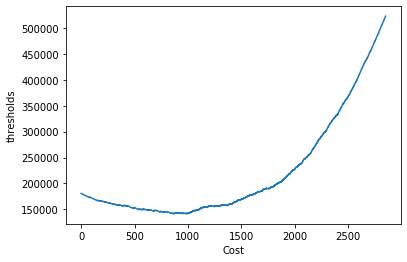

In [70]:
# Plot of the equation for differnt threshold values

plt.xlabel("Cost")
plt.ylabel('thresholds')
sns.lineplot(x = [x for x in range(len(threshold))] , y = A_lst)
plt.plot()

In [71]:
data["A_values"] = A_lst
min_A = min(A_lst)
min_A
var = data['prob'][data['A_values'] == min_A].values
print("Threshold value at which the value of A is minimum: {}".format(var))

Threshold value at which the value of A is minimum: [0.23003903]


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [32]:
#  Importing the dataset

data_4 = pd.read_csv('5_d.csv')
data_4.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


##  Mean square error

In [33]:
def mse(data):
    data = data
    err = 0
    for i in range(len(data)):
        err = err + (data['pred'][i] - data['y'][i])**2 
    return 1/len(data)*err

In [34]:
mse(data_4)

177.16569974554707

In [ ]:
for i in tqdm(range(0,len(d_csv))):
    
    d_csv['pred'].loc[i]=((d_csv.y[i])-(d_csv.pred[i]))*((d_csv.y[i])-(d_csv.pred[i]))
    #d_csv['pred'].loc[i]**2
avg=(d_csv['pred'].sum())/len(d_csv)
print('MSE :',avg)

##  Mean Absolute Percentage error

In [38]:
def mape(data):
    data = data
    err = 0
    a_avg = sum(data['pred'].values)/len(data)
    for i in range(len(data)):
        err = err + abs(data['pred'][i] - data['y'][i]) 
        
    return 1/len(data)*(err/a_avg)

In [39]:
mape(data_4)

0.12927250737711507

In [40]:
len(data_4.values)

157200

## R^2 error

In [ ]:
# Formula for R^2 is :
# R^2 = SS_reg/ SS_tot     where SS_reg is total sum of regression

In [62]:
def R_squared(data):
    SS_tot = 0   # Total sum of squares
    SS_reg = 0     # Regression sum of squares
    y_bar = np.mean(data['pred'].values)  # Mean of all predicted values
    
    for i in range(len(data)):
        SS_reg = (data['pred'][i] -  y_bar)**2 + SS_reg
    
    for i in range(len(data)):
        SS_tot = (data['y'][i] - y_bar)**2  + SS_tot
        
    return SS_reg/SS_tot

In [63]:
R_squared(data_4)

0.9573353892619763